<a href="https://colab.research.google.com/github/thiagoCorreaOriginal/Portfolio/blob/main/FaturamentoRioDeJaneiro.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Pré-processamento dos dados

>Importar as bibliotecas que serão usadas na pipeline:

In [3]:
# biblioteca que ofere funções matemáticas no python
import numpy as np
# biblioteca para usar e lidar com datasets
import pandas as pd
# biblioteca que contém um útil acervo de gráficos a serem usados
import matplotlib.pyplot as plt
# biblioteca que permite outros gráficos interessantes
import seaborn as sns
# biblioteca do conjunto sklearn para fazer o modelo de regressão linear
from sklearn.linear_model import LinearRegression
# biblioteca de divisão em treino e teste
from sklearn.model_selection import train_test_split
# biblioteca de padronização da escala dos dados
from sklearn.preprocessing import StandardScaler
# biblioteca de uso da métrica de mse
from sklearn.metrics import mean_squared_error

> Importar o conjunto de dados que será analisado

In [4]:
dados = pd.read_csv("DesafioEstagioMachineLearning.csv")

In [5]:
dados.head(1)

,codigo,nome,cidade,estado,população,popAte9,popDe10a14,popDe15a19,popDe20a24,popDe25a34,popDe35a49,popDe50a59,popMaisDe60,domiciliosA1,domiciliosA2,domiciliosB1,domiciliosB2,domiciliosC1,domiciliosC2,domiciliosD,domiciliosE,rendaMedia,faturamento
0,3304557060,Abolição,Rio de Janeiro,RJ,11676,1027,483,688,800,1675,2300,1784,2919,0,145,715,1242,1093,758,92,304,2501.0,932515.0


#**Dicionário dos dados:**


---


* codigo: Código do bairro
* nome: Nome do bairro
* cidade: Cidade
* estado: Estado
* população: População total
* popAte9: População - até 9 anos
* popDe10a14: População - de 10 a 14 anos
* popDe15a19: População - de 15 a 19 anos
* popDe20a24: População - de 20 a 24 anos
* popDe25a34: População - de 25 a 34 anos
* popDe35a49: População - de 35 a 49 anos
* popDe50a59: População - de 50 a 59 anos
* popMaisDe60: População - 60 anos ou mais
* domiciliosA1: Quantidade de Domicílios de Renda A1
* domiciliosA2: Quantidade de Domicílios de Renda A2
* domiciliosB1: Quantidade de Domicílios de Renda B1
* domiciliosB2: Quantidade de Domicílios de Renda B2
* domiciliosC1: Quantidade de Domicílios de Renda C1
* domiciliosC2: Quantidade de Domicílios de Renda C2
* domiciliosD: Quantidade de Domicílios de Renda D
* domiciliosE: Quantidade de Domicílios de Renda E
* rendaMedia: Renda Média por Domicílio
* faturamento: Faturamento Total no Bairro

# Limpeza e tratamento dos dados

In [6]:
# tipo dos dados
dados.dtypes

codigo            int64
nome             object
cidade           object
estado           object
população         int64
popAte9           int64
popDe10a14        int64
popDe15a19        int64
popDe20a24        int64
popDe25a34        int64
popDe35a49        int64
popDe50a59        int64
popMaisDe60       int64
domiciliosA1      int64
domiciliosA2      int64
domiciliosB1      int64
domiciliosB2      int64
domiciliosC1      int64
domiciliosC2      int64
domiciliosD       int64
domiciliosE       int64
rendaMedia      float64
faturamento     float64
dtype: object

> As quatro primeiras features (colunas) não agregam muito para a análise, uma vez que elas representam apenas uma identificação sobre a inserção do dado, além de não impactarem no modelo (nesse momento)

In [7]:
# Uma característica interessante dos dados é que todas as ocorrências pertencem a cidade do Rio de Janeiro
dados['cidade'].value_counts()

Rio de Janeiro    160
Name: cidade, dtype: int64

In [8]:
# Portanto podemos remover os dados categóricos e a coluna código
dados.drop(['codigo','nome','cidade','estado'], axis = 1 , inplace = True)

In [9]:
# Verificar a existência de dados nulos
print(pd.isnull(dados).sum())

população       0
popAte9         0
popDe10a14      0
popDe15a19      0
popDe20a24      0
popDe25a34      0
popDe35a49      0
popDe50a59      0
popMaisDe60     0
domiciliosA1    0
domiciliosA2    0
domiciliosB1    0
domiciliosB2    0
domiciliosC1    0
domiciliosC2    0
domiciliosD     0
domiciliosE     0
rendaMedia      6
faturamento     0
dtype: int64


A renda media possui 6 linhas faltantes, portanto é necessário preenchê-las de alguma forma

In [10]:
dados['rendaMedia'].describe()

count      154.000000
mean      3608.071429
std       6091.865305
min        654.000000
25%       1486.000000
50%       1915.500000
75%       2954.500000
max      63887.000000
Name: rendaMedia, dtype: float64

In [11]:
# Devido a média ter uma diferença considerável da mediana, podemos ver os valores maiores
# para averiguar a existência de outliers que impactem no número da média
dados.sort_values('rendaMedia', ascending=False).head()

,população,popAte9,popDe10a14,popDe15a19,popDe20a24,popDe25a34,popDe35a49,popDe50a59,popMaisDe60,domiciliosA1,domiciliosA2,domiciliosB1,domiciliosB2,domiciliosC1,domiciliosC2,domiciliosD,domiciliosE,rendaMedia,faturamento
80,21795,1794,708,1054,1252,2943,4812,3594,5638,2916,2140,1931,697,365,306,0,469,63887.0,1775547.0
9,139761,13038,5225,7432,8627,21914,32089,21058,30378,13408,11668,14820,5205,3437,1841,0,3897,18084.0,2915612.0
75,18517,1602,664,945,1008,2788,4135,2822,4553,1641,1273,1913,1108,815,361,0,289,17984.0,1491476.0
79,842,61,29,35,46,131,192,132,216,79,59,57,33,7,8,0,20,17659.0,1162364.0
131,11290,885,500,661,726,1464,2463,1741,2850,939,956,744,418,432,356,37,207,17650.0,1330747.0


Nesse caso, há uma ocorrência que se destaca das demais, contendo uma renda média assustadoramente maior que as demais, fato que impacta no valor da média, portanto usaremos o valor da mediana para preencher as lacunas dos dados

In [12]:
# Preenchendo com o valor da mediana
dados.update(dados['rendaMedia'].fillna(dados['rendaMedia'].median()))

Dessa forma os dados já foram limpos e estão prontos para a análise exploratória

# Análise exploratória dos dados

> Uma forma interessante de iniciar a análise, é observar a correlação entre os itens presentes

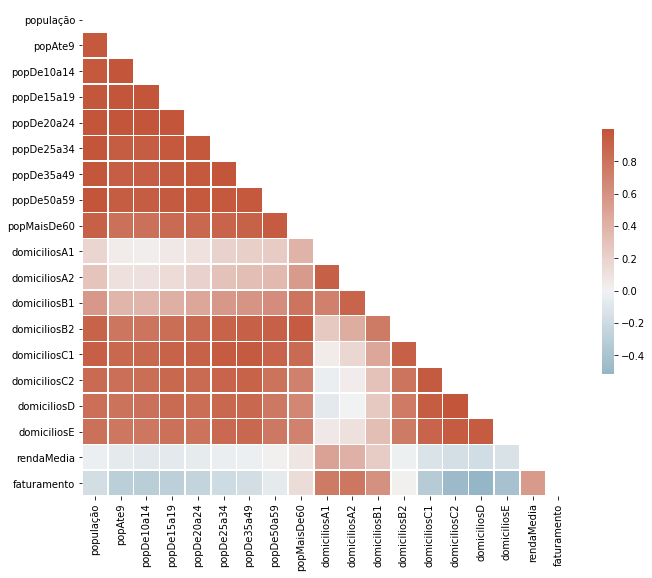

In [13]:
# Gráfico de correlação entre os dados coletados
corr = dados.corr()

# Gerar uma máscara para o triângulo de cima
mask = np.triu(np.ones_like(corr, dtype=bool))

# mudar o tamanho da figura e seus subplots
f, ax = plt.subplots(figsize=(11, 9))

# customizar a paleta de cores
cmap = sns.diverging_palette(230, 20, as_cmap=True)

# desenhar o heatmap com os parâmetros definidos
sns.heatmap(corr, mask=mask, cmap=cmap, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

A última linha do eixo Y representa o faturamento, ou seja, a renda média e os primeiros tipos de domícilio são os que mais impactam na variação do faturamento, o heatmap também mostra que quanto maior é a quantidade de domícilios de classe mais alta, mais díficil é compreender um padrão entre a faixa etária da população

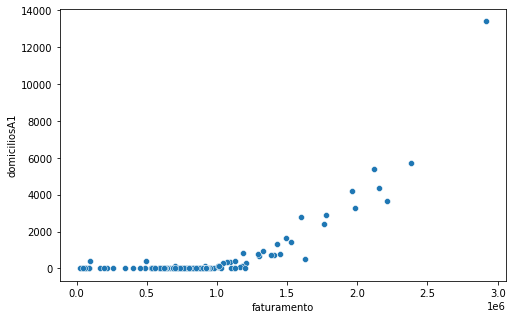

In [14]:
# tamanho do gráfico
plt.figure(figsize=(8,5))
# definir o gráfico de pontos
sns.scatterplot(y='domiciliosA1', x='faturamento', data = dados)
# mostrar ele
plt.show()

Conforme a quantidade de domícilios A1 vão aumentando, maior é o faturamento, mostrando uma correlação forte e válida, não há casos de bairros com poucos domícilios A1 e com muito faturamento, ou com pouco faturamento e muitos domícilios desse tipo

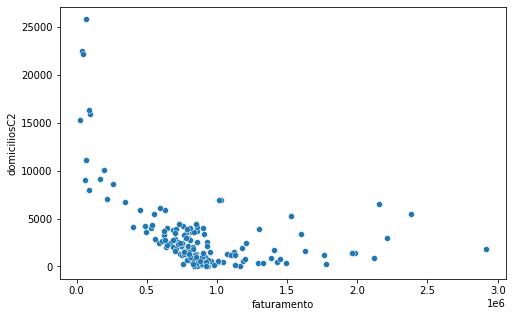

In [15]:
# tamanho do gráfico
plt.figure(figsize=(8,5))
# definir o gráfico de pontos
sns.scatterplot(y='domiciliosC2', x='faturamento', data = dados)
# mostrar ele
plt.show()

A mesma tendência mostrada no gráfico anterior também ocorre nesse novo gráfico só que de forma inversa, quanto mais domícilios C2 (e C2 pra baixo) existem no bairro, menor é o faturamento 

> Gerar um gráfico de barras com a faixa etária

In [16]:
faixa = []
colunas_faixas = dados[['popAte9','popDe10a14','popDe15a19','popDe20a24','popDe25a34','popDe35a49','popDe50a59','popMaisDe60']]
# for que percorre as colunas e armazena a soma das linhas de cada uma
for coluna,valor in colunas_faixas.iteritems():
  faixa.append(colunas_faixas[coluna].sum())

dicio = {}
# for que une o nome das colunas com sua respectiva soma
for c, v in zip(colunas_faixas, faixa):
  dicio[c] = v

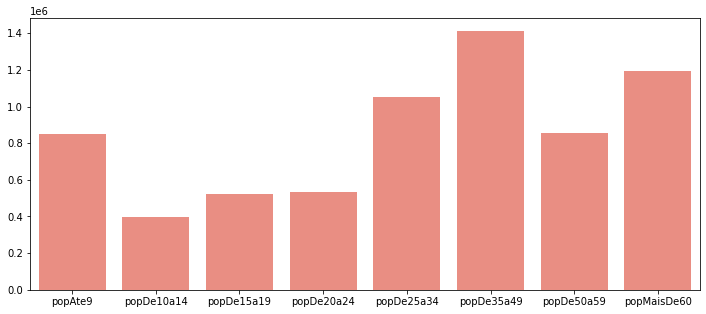

In [17]:
# tamanho do gráfico
plt.figure(figsize=(12,5))
# definir o gráfico de barras
sns.barplot(x =list(dicio.keys()), y=list(dicio.values()), color = "salmon")
# mostrar ele
plt.show()

Como podemos ver, a quantidade de pré-adolescentes e adolescentes é pequena em relação ao por exemplo a quantidade de pessoas entre 35 a 49 anos, há uma considerável quantidade de pessoas economomicamente improdutivas (crianças e idosos) e boa parte da população está entre 25 e 49 anos

> Gráficos de barras com a quantidade de domícilios por tipo

In [18]:
domicilio = []
colunas_dom = dados[['domiciliosA1','domiciliosA2','domiciliosB1','domiciliosB2','domiciliosC1','domiciliosC2','domiciliosD','domiciliosE']]
# for que percorre as colunas e armazena a soma das linhas de cada uma
for coluna,valor in colunas_dom.iteritems():
  domicilio.append(colunas_dom[coluna].sum())

dicio_dom = {}
# for que une o nome das colunas com sua respectiva soma
for c, v in zip(colunas_dom, domicilio):
  dicio_dom[c] = v

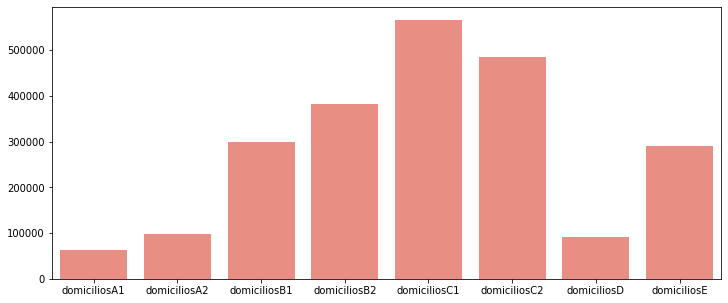

In [19]:
# tamanho do gráfico
plt.figure(figsize=(12,5))
# definir o gráfico de barras
sns.barplot(x =list(dicio_dom.keys()), y=list(dicio_dom.values()), color = "salmon")
# mostrar ele
plt.show()

Os domícilios mais comuns são os "médios", da classe B2 até C2, lembrando até uma distribuição normal, também é interessante que o tipo D é tão raro quanto os do tipo A

# Modelagem da regressão linear

> O modelo irá prever o faturamento com bases nas variáveis escolhidas

In [20]:
# o X é maiúsculo para demonstrar uma relação de dependência, no qual o x compõem as
# variáveis independentes e o y compõe a targe (variável dependente)
X = dados.drop('faturamento', axis = 1)
# o y será o alvo a ser predito
y = dados['faturamento']

> Para evitar o overffiting (modelo decorando os dados), iremos dividir o conjunto de dados em treino e teste

In [21]:
# Treino terá 70% dos dados enquanto o conjunto de teste terá 30%
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 42)

> Normalização dos dados independentes (X)

In [22]:
range_populacao = dados['população'].max() - dados['população'].min()
range_idade = dados['popDe35a49'].max() - dados['popDe35a49'].min()
range_domicilio = dados['domiciliosC1'].max() - dados['domiciliosC1'].min()
range_renda = dados['rendaMedia'].max() - dados['rendaMedia'].min()
print("Tamanho das escalas: \npopulação: {}\nidade:{}\ndomicilio: {}\nrenda: {}".format(range_populacao,range_idade,range_domicilio,range_renda))

Tamanho das escalas: 
população: 667430
idade:105278
domicilio: 33106
renda: 63233.0


Apesar da população estar em uma escala maior do que as outras, a variação não é grande o suficiente para impactar na influência exercida no modelo

>  **Regressão linear**

In [23]:
# instanciar o modelo de regressão
lr = LinearRegression()

In [24]:
# Treinar o modelo no conjunto de treino
lr.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [25]:
# armazenar a predição
y_pred= lr.predict(X_test)

In [26]:
# Usar a métrica MSE e RMSE para averiguar o erro do modelo no treino
print('MSE (Treino)', mean_squared_error(y_train, lr.predict(X_train)))
print('RMSE (Treino)', np.sqrt(mean_squared_error(y_train, lr.predict(X_train))))

MSE (Treino) 4793153264.604732
RMSE (Treino) 69232.60261325391


In [27]:
# Usar a métrica MSE e RMSE para averiguar o erro do modelo no teste
print('MSE (Teste)', mean_squared_error(y_test, y_pred))
print('RMSE (Teste)', np.sqrt(mean_squared_error(y_test, y_pred)))

MSE (Teste) 95690859202.4314
RMSE (Teste) 309339.3916112712


Podemos perceber que o modelo tem excelentes números no treino, mas ao usá-los no teste o erro aumenta considerávelmente, ou seja, a variância do modelo está alta, o que indica um leve overffiting

In [28]:
# Score do modelo
lr.score(X_test,y_test)

0.6854729540578055

O modelo de regressão linear se aproxima 68% do valor real

In [29]:
# coeficiente de angulação do modelo:
lr.intercept_

815803.9410079109

> Importância (peso) de cada feature no modelo

In [30]:
# instalar biblioteca de análise de váriaveis independentes
!pip install eli5

     |████████████████████████████████| 112kB 6.9MB/s 


In [31]:
# importar eli5
import eli5
# importar biblioteca que demonstra a importância 
from eli5.sklearn import PermutationImportance

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.feature_selection.base module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.feature_selection. Anything that cannot be imported from sklearn.feature_selection is now part of the private API.
  warnings.warn(message, FutureWarning)


In [32]:
perm = PermutationImportance(lr).fit(X_train, y_train)

In [33]:
eli5.show_weights(perm, feature_names= list(X.columns))

Weight,Feature
47.1851 ± 3.7115,popDe15a19
30.9807 ± 2.4929,popDe20a24
24.9110 ± 2.1871,popDe25a34
13.1806 ± 1.0073,popDe35a49
11.7445 ± 0.6883,popDe10a14
2.2170 ± 0.0833,popDe50a59
1.4074 ± 0.2820,popMaisDe60
0.8636 ± 0.1192,popAte9
0.7685 ± 0.0292,domiciliosC2
0.7159 ± 0.0895,domiciliosC1


Como podemos ver, as variáveis que mais impactaram no modelo registram sendo as que demonstram a faixa etária

> Análise de resíduos

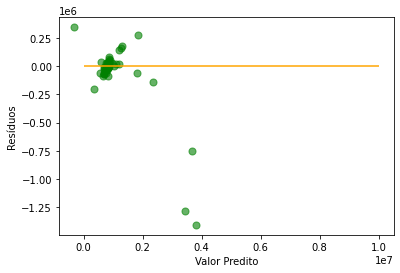

In [34]:
# resíduos
res = y_test - y_pred
# scatter plot com os resíduos e os valores preditos
plt.scatter(y=res,x=y_pred,color = 'green', s=50, alpha =.6)
# reta que representa a reta de regressão linear
plt.hlines(y=0,xmin=0,xmax=10000000,color='orange')
plt.xlabel('Valor Predito')
plt.ylabel('Resíduos')
plt.show()

Devido os resíduos não se distanciarem muito, é perceptível que há valores outliers que acabam prejudicando a performance do modelo (há a possibilidade da regressão linear não conseguir lidar com eles também)

> Análise dos resultados da regressão 

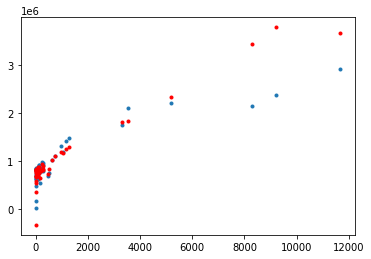

In [42]:
# dados reais em azul
plt.plot(X_test['domiciliosA2'], y_test, '.')
# dados reais em vermelho
plt.plot(X_test['domiciliosA2'], y_pred,'r.')

Como podemos ver, os dados preditos estão relativamente próximos dos dados que foram usados pra testar o modelo

> Dessa forma, conseguimos fazer um modelo de regressão linear tecnicamente aceitável, indicando ótimos resultados com modelos de regressão mais complexos, a regressão linear apesar de simples foi muito útil para a compreensão e predição dos dados